## Analysis of acoustic signals - plain code

This notebook is the initial implementation of the required functionalities in plain python code.

In [5]:
from acoustics import generalized_detrending, sorted_density, sorted_density_feature, gaussian_sorted_density
from acoustics_helpers import remove_direct_sound, curve_fitting_echo_density

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

In [7]:
with h5py.File('data.h5', 'r') as hf:
    Fs_array = list(hf['Fs'])
    dataset_simulation_polybox = list(hf['dataset_simulation_polybox'])
    dataset_simulation_sliding_lid = list(hf['dataset_simulation_sliding_lid'])
    dataset_measurement_volume = list(hf['dataset_measurement_volume'])

In [8]:
Fs = Fs_array[1]

In [9]:
# ws stands for window size
ws_detrending = int(0.025*Fs)     # 25ms
ws_sorted_density = int(0.2*Fs)   # 200ms
milliseconds_to_remove = 10 # for the remove the direct path function
signal_length = 1

In [10]:
gaussian_sd = gaussian_sorted_density(ws_detrending, Fs)
print('Sorted density for Gaussian signal: ', gaussian_sd)

Sorted density for Gaussian signal:  0.18394016338282398


In [11]:
dictionary = {'closed' : dataset_simulation_sliding_lid[0], 
              'almost_closed' : dataset_simulation_sliding_lid[1], 
              'almost_open' : dataset_simulation_sliding_lid[2], 
              'open' : dataset_simulation_sliding_lid[3]}
data_simulation_sliding_lid = pd.DataFrame(data = dictionary, index = pd.timedelta_range(start=pd.Timedelta(days=0), 
                                                                                         freq=str(round(1000/Fs, 5)) + 'ms', 
                                                                                         periods=len(dataset_simulation_sliding_lid[0])))
data_simulation_sliding_lid.head()

,closed,almost_closed,almost_open,open
00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
00:00:00.000170,4.443116e-07,4.372601e-07,4.443116e-07,4.456350e-07
00:00:00.000340,1.300656e-05,1.283440e-05,1.300656e-05,1.303693e-05
00:00:00.000510,4.364509e-05,4.311583e-05,4.364509e-05,4.377377e-05
00:00:00.000680,1.987153e-05,1.957845e-05,1.987153e-05,1.991281e-05


In [12]:
signal = data_simulation_sliding_lid['closed'].to_numpy()

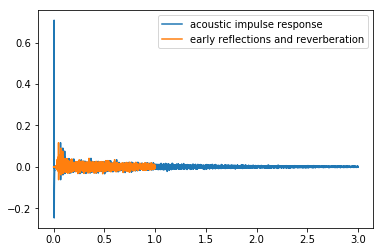

In [13]:
t = np.array(range(len(signal)))/Fs
plt.plot(t[:len(signal)], signal, label='acoustic impulse response')
signal = remove_direct_sound(signal, Fs, signal_length)
plt.plot(t[:len(signal)], signal, label='early reflections and reverberation')
plt.legend()

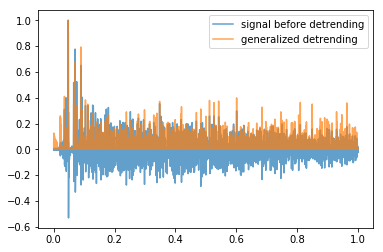

In [14]:
detrended_signal = generalized_detrending(signal, ws_detrending, Fs)
plt.plot(t[:len(signal)], signal/np.max(np.abs(signal)), alpha=0.7, label='signal before detrending')
plt.plot(t[:len(detrended_signal)], detrended_signal/np.max(np.abs(detrended_signal)), alpha=0.7, label='generalized detrending')
plt.legend()

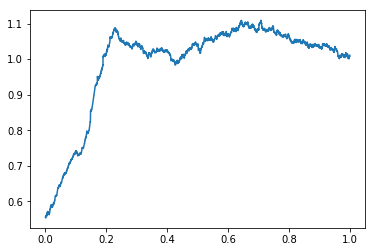

In [15]:
echo_density = sorted_density_feature(detrended_signal, ws_sorted_density, Fs)
echo_density = echo_density/gaussian_sd
plt.plot(t[:len(echo_density)], echo_density)

In [16]:
n = curve_fitting_echo_density(echo_density, Fs)
print(n)

1.6312575425264249


### Each one of the demos has some specific parameters

In [17]:
# simulations: polybox, 1, curve fitting
# simulations: sliding lid, 1, curve fitting
# measurements: volume, 1, curve fitting 2

In [ ]:
#2nd version of curve fitting:
data_points_in = data_points_in(round(Fs)*0.02:end);
E0 = data_points_in(1);
data_points = max(data_points_in - E0, 0) + 0.0001;
index = 0;
t = (index + (1:length(data_points)))/Fs; 
t_bias = 0.03; % comes from the removal of the direct path